# **Naive Bayes**


Naive Bayes is a classification algorithm based on Bayes' theorem. The term "naive" refers to the assumption that the presence of a particular feature in a class is unrelated to the presence of any other feature, i.e. all the features in the dataset are independent and of equal importance.

Naive Bayes classifiers are widely used in machine learning for various classification tasks, including email spam detection, document categorization, sentiment analysis, and medical diagnosis.

Overall, Naive Bayes classifiers are simple yet effective algorithms known for their fast training speed and ability to handle large datasets.

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the Dataset**

In [3]:
df = pd.read_csv('/content/sample_data/diabetes_dataset.csv')

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6       62             94             46      275  41.280487   
1            3      143            119             59       60  41.409001   
2           12       96             97             62      157  18.609335   
3           14       63             40             16      137  46.589352   
4           10       88             40             35      119  32.683833   

   DiabetesPedigreeFunction  Age  Outcome  
0                  2.438548   78        1  
1                  2.466906   71        1  
2                  1.775588   39        0  
3                  1.386631   41        1  
4                  0.842866   25        1  


# **EDA** (Dataset 1)

In [5]:
df.shape

(100, 9)

**Interpretation**: This shows that the dataset has 9 attributes or columns and total of 768 rows of data.

In [6]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


**Interpretation**:

The dataset consists of various features related to diabetes diagnosis:

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function (a function that scores likelihood of diabetes based on family history)

**Age**: Age in years

**Outcome**: Binary variable indicating presence or absence of diabetes (1: Diabetes, 0: No diabetes)

This information highlights the various physiological and demographic factors considered in diagnosing diabetes, with the Outcome variable serving as the target variable for classification tasks.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               100 non-null    int64  
 1   Glucose                   100 non-null    int64  
 2   BloodPressure             100 non-null    int64  
 3   SkinThickness             100 non-null    int64  
 4   Insulin                   100 non-null    int64  
 5   BMI                       100 non-null    float64
 6   DiabetesPedigreeFunction  100 non-null    float64
 7   Age                       100 non-null    int64  
 8   Outcome                   100 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 KB


**Interpretation**:

df.info() shows the null count along with other details. Here, it can be seen that all the columns have 768 rows of data no null values.

In [8]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Interpretation**: The above interpretation can be confirmed ny the isnull() method which is clearly showing that none of the atrribute have null values.

If null values were found we would have used df = df.dropna() to drop na

OR

.fillna to fill na with some values. (mean, mode, etc)

In [9]:
print(df.describe())

       Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
count   100.000000  100.00000     100.000000       100.0000  100.000000   
mean      7.270000  122.16000      76.310000        51.2000  151.890000   
std       4.251809   44.74478      26.969004        22.9545   74.281052   
min       0.000000    0.00000       0.000000        10.0000    0.000000   
25%       3.750000   84.75000      57.000000        32.7500  102.750000   
50%       7.000000  119.00000      74.500000        53.5000  149.500000   
75%      11.000000  161.75000      97.000000        68.0000  211.000000   
max      14.000000  199.00000     120.000000        98.0000  275.000000   

              BMI  DiabetesPedigreeFunction       Age     Outcome  
count  100.000000                100.000000  100.0000  100.000000  
mean    32.902287                  1.402178   50.9100    0.540000  
std     10.971382                  0.714671   16.9295    0.500908  
min     15.379318                  0.134907   21.000

**Interpretation**:

The .describe() function gives a deep statistical analysis of the dataset. For eg,

**Pregnancies**: Average around 3.85, with most below 6.

**Glucose**: Average around 120.89 mg/dL, with some unrealistic zero values.

# **Identified a Problem** (Dataset 1)

In [10]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df[columns_to_replace] = df[columns_to_replace].replace(0, pd.NA)

**Interpretation**: Identified a problem that the columns glucose, bloodpressure, skinthickness, and insulin have unrealistic 0 values.

Unrealistic because if someone had glucose, bp, etc as 0 they would not be alive.

Therefore, Zero values here are considered inconsistent and likely represent missing data.

Here, we have replaced all 0 values with NA.

In [11]:
for column in columns_to_replace:
    mean_value = df[column].mean()
    df[column].fillna(round(mean_value), inplace=True)

<ipython-input-11-25afc8bf07f9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(round(mean_value), inplace=True)
<ipython-input-11-25afc8bf07f9>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].fillna(round(mean_value), inplace=True)


**Interpretation**: The values that were recently converted to na are replaced with the closest int value to mean values of the respective attributes.

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,100.000000,100.000000,100.000000,100.0000,100.00000,100.000000,100.000000,100.0000,100.000000
mean,7.270000,123.390000,78.680000,51.2000,153.42000,32.902287,1.402178,50.9100,0.540000
std,4.251809,43.009723,23.354051,22.9545,72.67934,10.971382,0.714671,16.9295,0.500908
min,0.000000,51.000000,40.000000,10.0000,17.00000,15.379318,0.134907,21.0000,0.000000
25%,3.750000,86.500000,58.000000,32.7500,103.00000,24.237720,0.821194,37.7500,0.000000
50%,7.000000,119.500000,76.500000,53.5000,155.00000,33.388982,1.428806,47.5000,1.000000
75%,11.000000,161.750000,97.000000,68.0000,211.00000,42.309265,2.058353,66.2500,1.000000
max,14.000000,199.000000,120.000000,98.0000,275.00000,49.753768,2.499322,80.0000,1.000000


**Interpretation**: As we can see now, the 4 columns dont have 0 as their min value indicating the 0's are effectively removed.

# **Visualization of the Dataset** (Dataset 1)


Correlation matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000 -0.007818      -0.058834      -0.101674   
Glucose                     -0.007818  1.000000       0.095328      -0.081644   
BloodPressure               -0.058834  0.095328       1.000000       0.169287   
SkinThickness               -0.101674 -0.081644       0.169287       1.000000   
Insulin                      0.196015 -0.101932      -0.058401       0.088837   
BMI                         -0.047584 -0.015450      -0.000533      -0.034209   
DiabetesPedigreeFunction    -0.035546 -0.071871       0.192875      -0.059473   
Age                         -0.033619  0.024658      -0.006154       0.022505   
Outcome                      0.163246 -0.128964       0.027009      -0.184308   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.196015 -0.047584                 -0.035546   
Glucose             

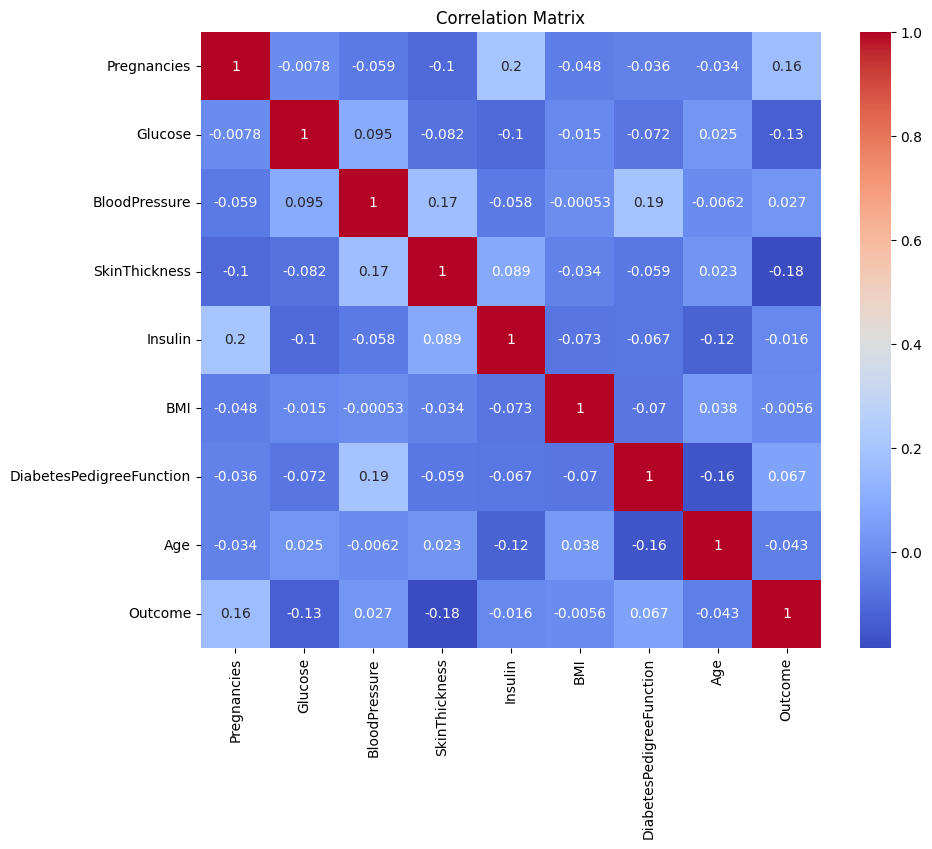

In [13]:
print("\nCorrelation matrix:")
print(df.corr())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interrpetation**: The correlation heatmap shows the degree of relation between attribute.

Here, we can interpret that the outcome (weather the patient is diabetic or not) is influenced the most by glucose level, BMI, age and number of pregnancies.

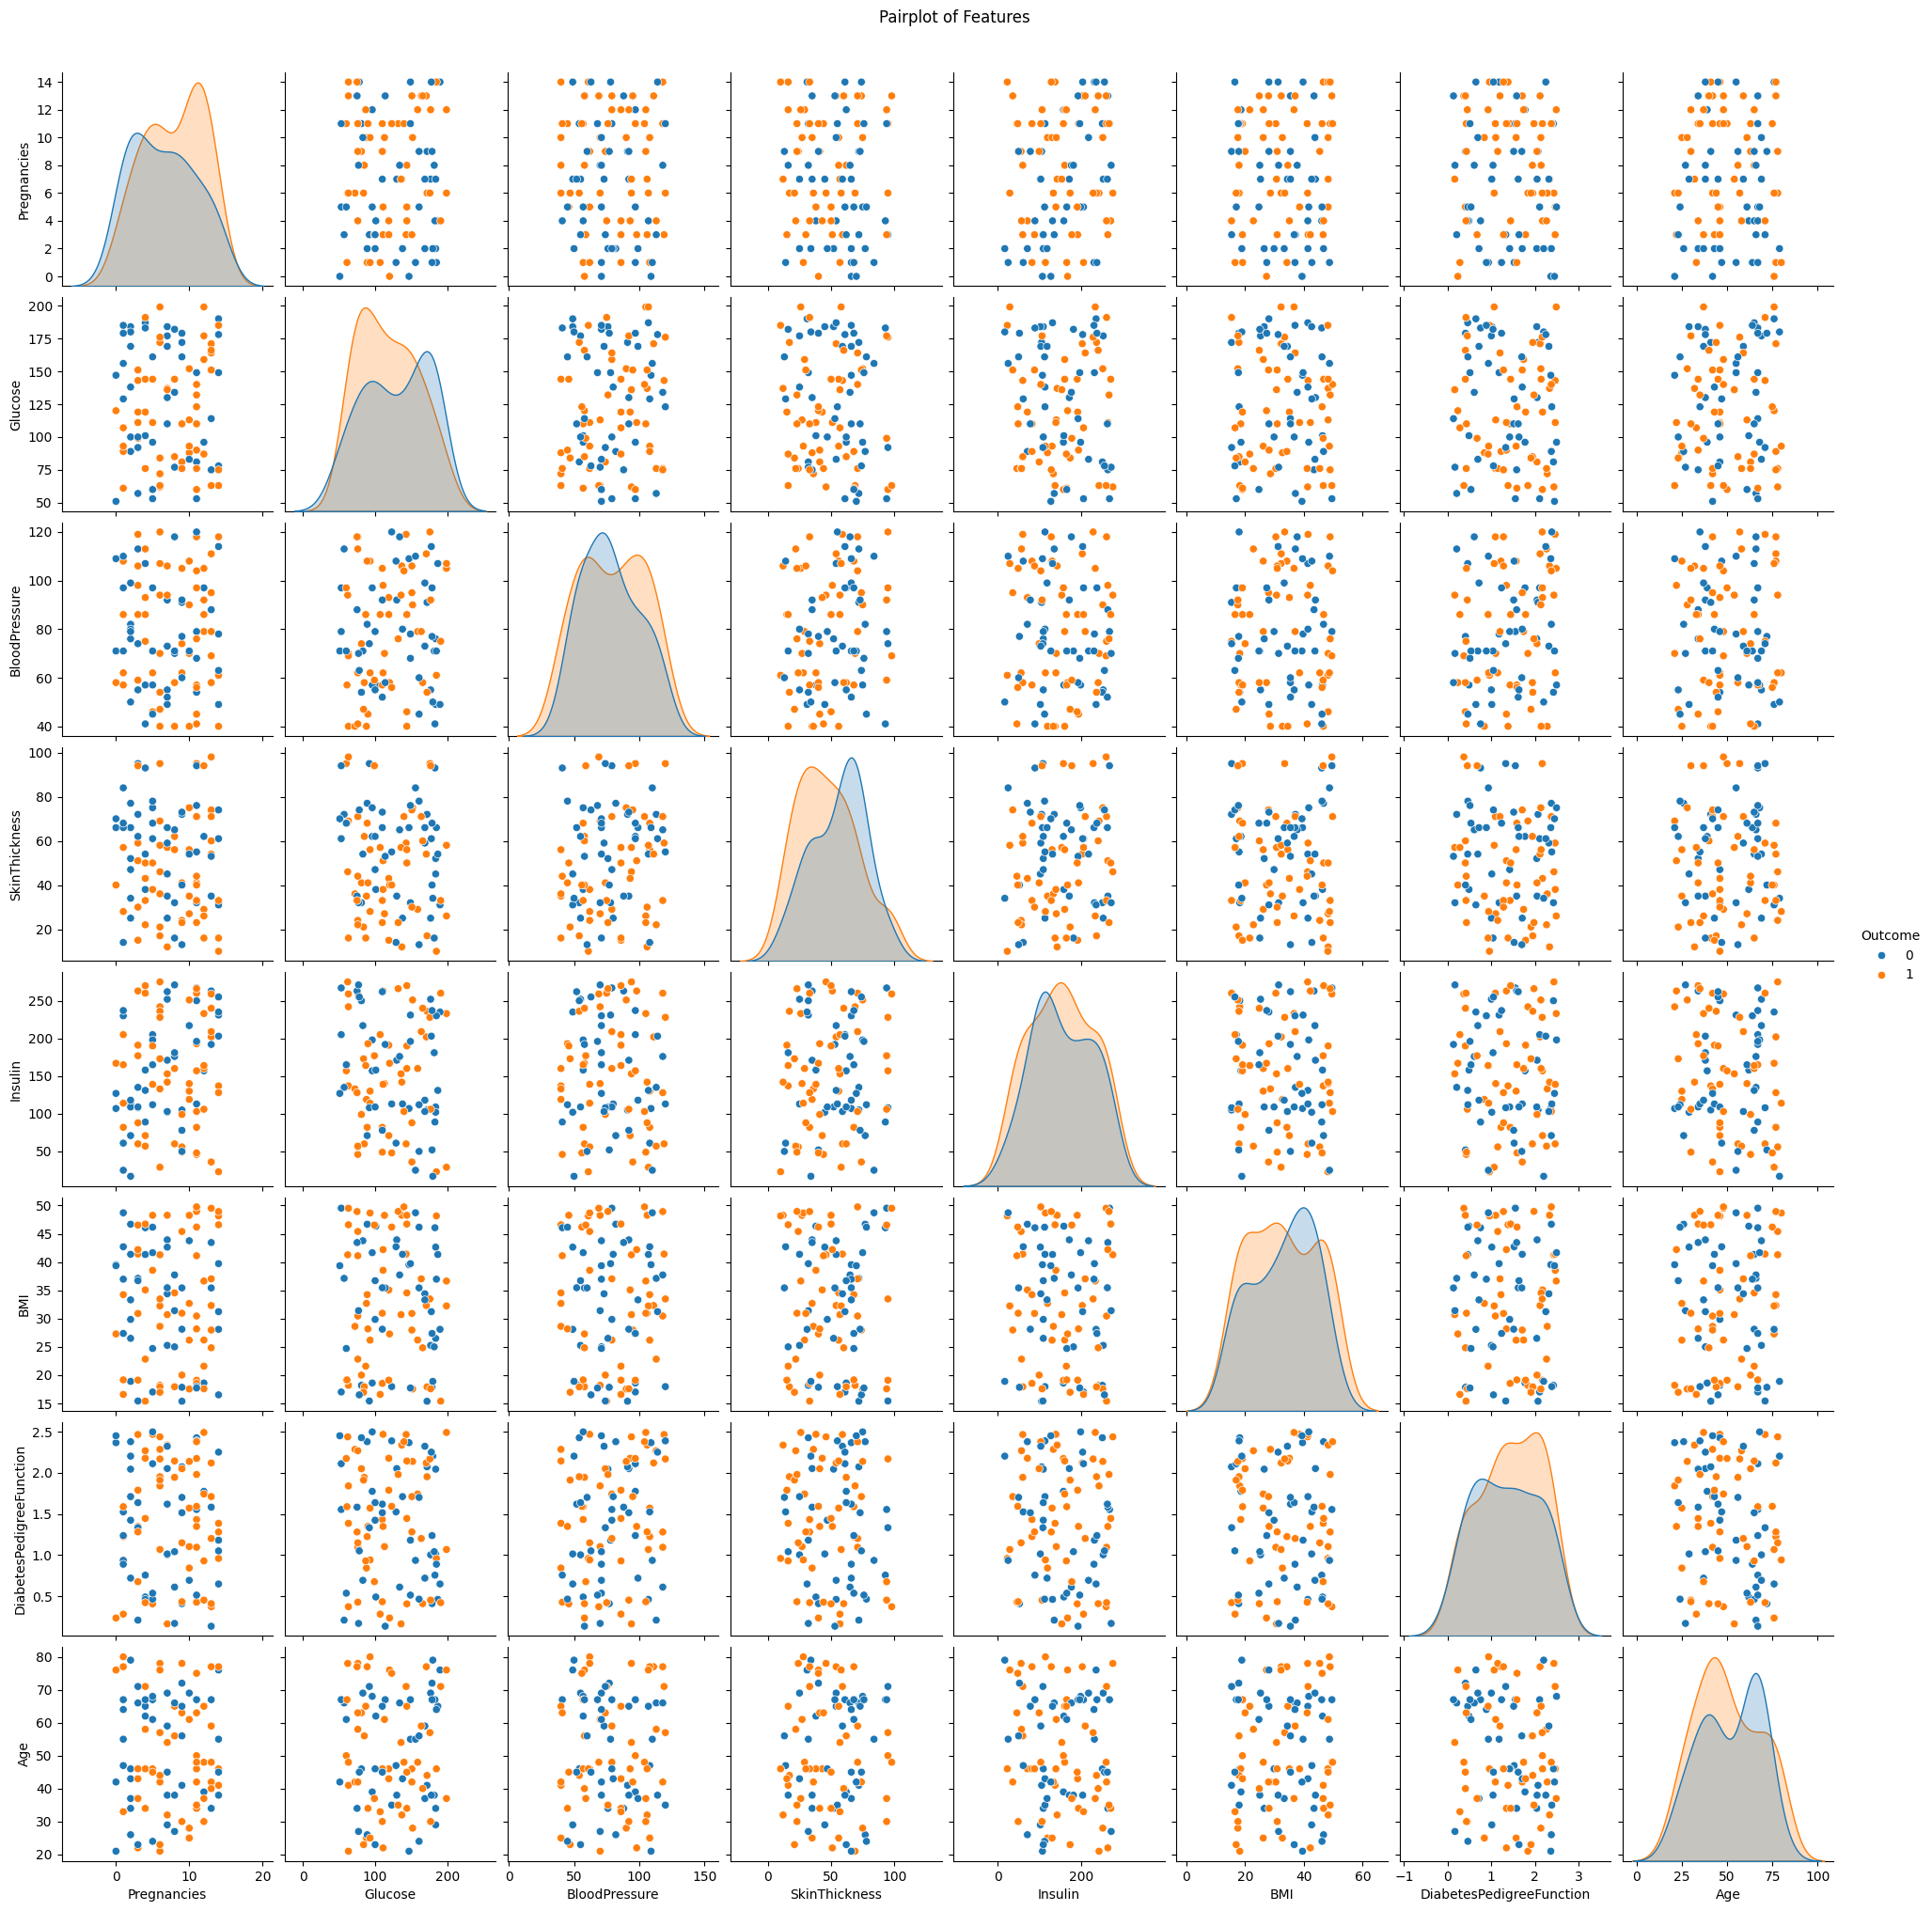

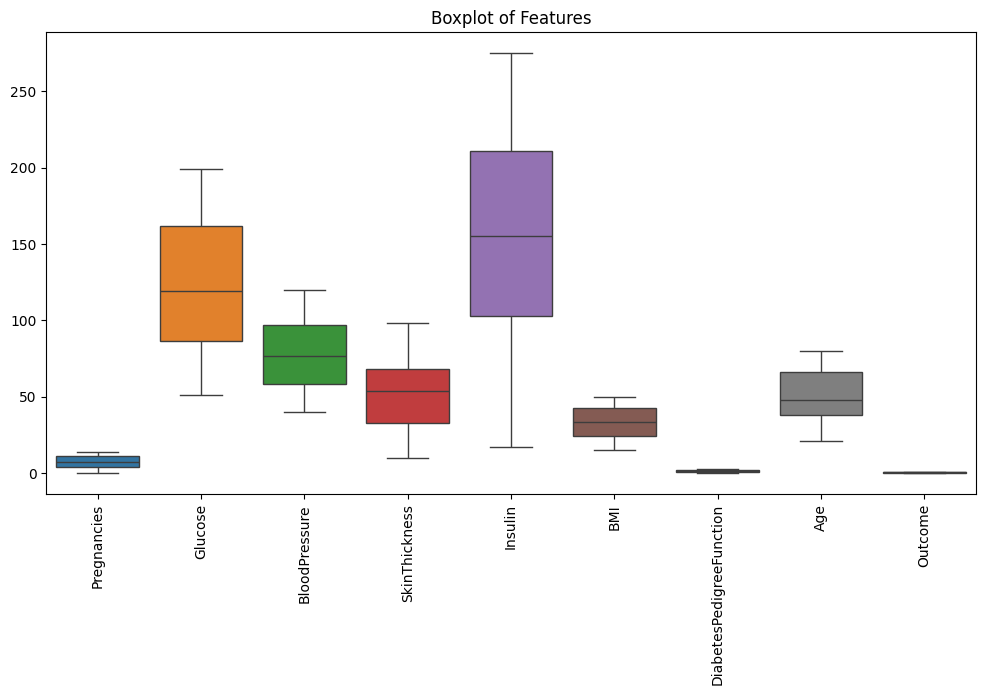

In [14]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()


**Interpretation**:

The pair plot is used to shoe the distribution of datapoints for each pair of attributes/features.

Here, for the pairplot the hue is the outcome indicating,
for ex, as the glocose levels are increasing most of the patients are classified as diabetic.

Also it can be interpreted that diabetic patients have higher insulin level, as in diabetes the patients body is not fully able to utilize the insulin produced, due to which the body feels less energetic and as a result the brain sends signal to produce more and more insulin.

Also it can be seen with increase in age more pateints are classified as diabetic as with increase in age the pancreas efficiency of insulin production goes down leading to more need for insulin resulting in diabetes.

Also people having higher BMI have higer chances of diabetes as higher BMI indicates improper lifestyle resulting in diabetes.

Similar interpretations can also be made from the box plot.The box plot also shows the outliers of the dataset.

# **Outliers using IQR** (Dataset 1)

In [15]:
df.shape

(100, 9)

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   7.250000
Glucose                      75.250000
BloodPressure                39.000000
SkinThickness                35.250000
Insulin                     108.000000
BMI                          18.071546
DiabetesPedigreeFunction      1.237159
Age                          28.500000
Outcome                       1.000000
dtype: float64


**Interpretation**: The IQR helps to identify the range within which the central 50% of the values lie. Here it shows that most BloodPressure (central Tendancy) in the dataset are near 16.

In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(100, 9)

**Interpretation**: This shows that the dataset had outliers and after removal of ouliers there are 508 rows of data left.

# **Train-Test Split** (Dataset 1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Interpretation:** Here we have made a train test split of 75:25. The X_train consists of the values set and the y_train consists the outcome set.

In [19]:
print(X_train)

[[4.00000000e+00 1.19000000e+02 9.30000000e+01 4.30000000e+01
  7.10000000e+01 3.50703261e+01 2.17855333e+00 4.60000000e+01]
 [1.40000000e+01 1.49000000e+02 7.80000000e+01 3.20000000e+01
  2.31000000e+02 3.97184780e+01 1.18130592e+00 5.50000000e+01]
 [1.40000000e+01 1.78000000e+02 1.14000000e+02 6.10000000e+01
  2.03000000e+02 3.12294442e+01 2.25229218e+00 3.80000000e+01]
 [9.00000000e+00 1.72000000e+02 9.10000000e+01 7.20000000e+01
  1.05000000e+02 1.53793178e+01 2.07408938e+00 4.10000000e+01]
 [3.00000000e+00 9.20000000e+01 7.40000000e+01 9.50000000e+01
  1.08000000e+02 1.54254066e+01 1.33357477e+00 7.10000000e+01]
 [6.00000000e+00 6.30000000e+01 7.00000000e+01 6.90000000e+01
  2.42000000e+02 1.81950337e+01 1.84172682e+00 2.10000000e+01]
 [1.40000000e+01 1.85000000e+02 6.10000000e+01 1.00000000e+01
  2.30000000e+01 4.81537002e+01 9.59590523e-01 4.60000000e+01]
 [1.00000000e+00 1.85000000e+02 7.10000000e+01 6.60000000e+01
  2.30000000e+02 3.69645328e+01 8.89003865e-01 6.40000000e+01]


In [20]:
print(y_train)

[1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1
 1]


In [21]:
print(X_test)

[[0.00000000e+00 5.10000000e+01 7.10000000e+01 7.00000000e+01
  1.27000000e+02 3.93512041e+01 2.45207818e+00 4.20000000e+01]
 [8.00000000e+00 1.44000000e+02 4.00000000e+01 5.60000000e+01
  1.60000000e+02 3.45441487e+01 2.14523560e+00 6.50000000e+01]
 [4.00000000e+00 7.60000000e+01 1.13000000e+02 2.20000000e+01
  5.70000000e+01 2.28258543e+01 2.26998087e+00 5.80000000e+01]
 [1.30000000e+01 1.51000000e+02 9.50000000e+01 7.40000000e+01
  3.60000000e+01 2.79724751e+01 1.71208164e+00 4.20000000e+01]
 [1.40000000e+01 1.90000000e+02 4.90000000e+01 3.10000000e+01
  2.35000000e+02 2.80994779e+01 6.48742733e-01 7.60000000e+01]
 [1.00000000e+01 8.30000000e+01 7.10000000e+01 5.40000000e+01
  2.17000000e+02 4.37651021e+01 6.93635444e-01 6.90000000e+01]
 [1.00000000e+00 1.29000000e+02 1.08000000e+02 1.40000000e+01
  6.10000000e+01 4.27052665e+01 1.52591372e+00 4.70000000e+01]
 [1.40000000e+01 7.50000000e+01 1.18000000e+02 3.30000000e+01
  1.28000000e+02 4.89255887e+01 1.28107910e+00 7.70000000e+01]


In [22]:
print(y_test)

[0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1]


# **Feature Scaling** (Dataset 1)

In [23]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Interpretation**:

**scaler = StandardScaler():** Initializes an instance of StandardScaler.

**X_standard = scaler.fit_transform(X_train):** Fits the StandardScaler to the training data (X_train) and then transforms it.



---

Here Feature Scaling was very important as some values such as DiabetesPedigreeFuction were between 0 and 1 while some values such as insulin had range upto 846. This would have lead to biased model which would produce inaccurate results. Here when we use standard scalar all value are scaled within the range -1 to 1, hence removing the bias.

# **Training Naive Bayes Model On Training Set** (Dataset 1)

In [24]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 75 samples
Test set size: 25 samples


**Interpretation**: Training and Test Split: Ensures that the model is trained on one subset of the data and tested on another to evaluate its performance on unseen data.

Here, we have split in 75:25 ration hence having 381 traning data and 127 test data.

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Interpretation**: An instance of Gaussian Naive Bayes is created. The model learns the relationship between the features and the target variable using the training data.

# **Predicting the Test Set Results** (Dataset 1)

In [28]:
y_pred = classifier.predict(X_test)
results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)
print(results)

[[0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]]


**Interpretation**: The two values in each row represent the predicted label and the actual label for each data point in the test set.

1.   The first value is the predicted label by the classifier.
2.   The second value is the actual label from the test set.

From the results it can be seen that most of the test datapoints have been classified correctly but there are also some datapoints that have been misclassified by the model.



# **Calculating the accuracy of the model** (Dataset 1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.56


**Interpretation**: The accuracy score of 0.56 suggests that the classifier's predictions are correct approximately 56% of the time when compared to the actual labels in the test data.

This shows that the model is performing fairly good but can be improved.

# **Making the Confusion Matrix** (Dataset 1)


Confusion Matrix:
[[ 4  5]
 [ 6 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.67      0.62      0.65        16

    accuracy                           0.56        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.57      0.56      0.56        25



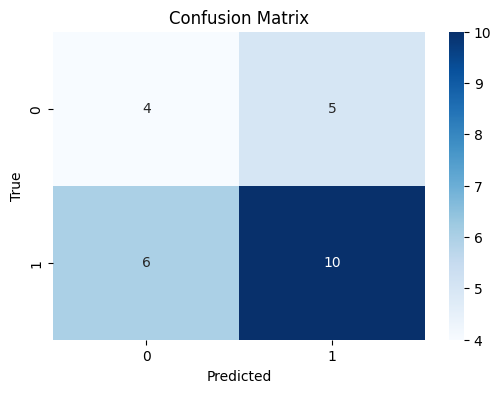

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Interpretation:**

**Confusion Matrix**

**True Negatives (TN):** The model correctly predicted 10 negative cases (actual class 0).

**False Positives (FP):** The model incorrectly predicted 5 cases as positive when they were actually negative.

**False Negatives (FN):** The model incorrectly predicted 6 cases as negative when they were actually positive.

**True Positives (TP):** The model correctly predicted 4 positive cases (actual class 1).



---


**Classification Report**
 The classification report provides a detailed evaluation of the performance of the k-NN model on each class.

for example, considering class 0:

**Class 0 (Non-Diabetic)**

**Precision:** Out of all the cases the model predicted as negative, 40% were actually negative.

**Recall:** Out of all the actual negative cases, the model correctly identified 44%.

**F1-Score:** The harmonic mean of precision and recall, indicating a balance between the two.

**Support:** The number of actual negative cases in the dataset.

# **ROC Curve** (Dataset 1)

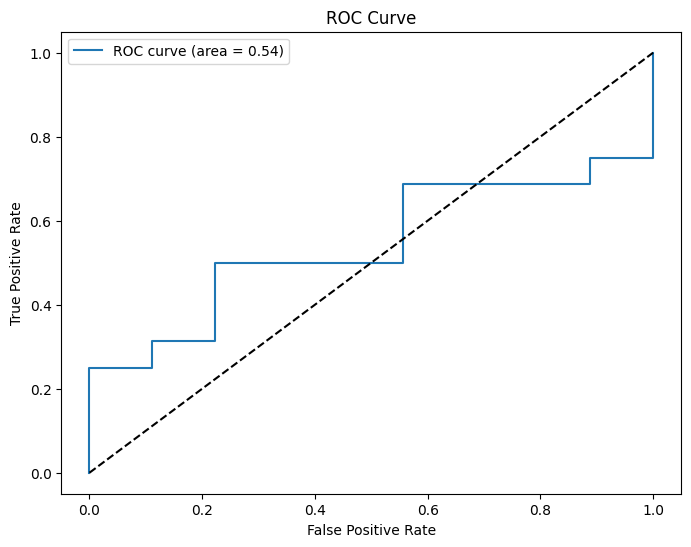


ROC AUC Score: 0.5416666666666667


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

print("\nROC AUC Score:", roc_auc)

**Interpretation**: The ROC AUC score of 0.804 indicates that the model has a good ability to distinguish between the positive and negative classes. The ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score is a measure of how well the model can separate classes.

The closer the ROC curve is to the top-left corner, the better the model. This indicates a high TPR and a low FPR.

# **Visualizations Of Training/Testing Data** (dataset 1)

ValueError: 'red' is not a valid color value.

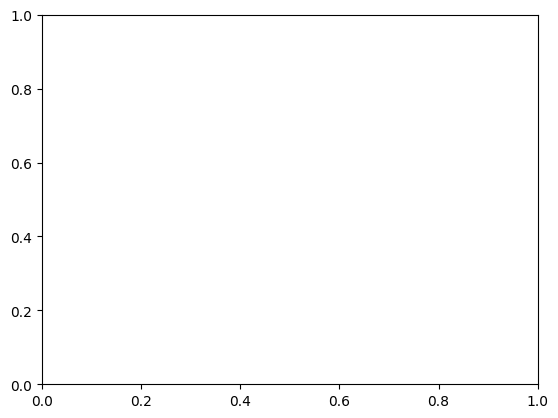

In [34]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
feature_one = 2
feature_two = 5
additional_features = np.mean(np.delete(X_set,[feature_one,feature_two],axis=1),axis=0)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))

num_points = X1.ravel().shape[0]
grid_additional_features = np.tile(additional_features, (num_points, 1))
grid = np.c_[X1.ravel(), X2.ravel(), grid_additional_features ]

Z = classifier.predict(grid).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.title('Naive Bayes (Training set)')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.legend()
plt.show()

ValueError: 'red' is not a valid color value.

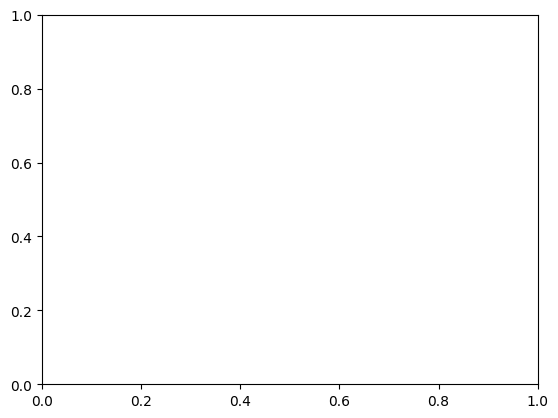

In [35]:
X_set, y_set = sc.inverse_transform(X_test), y_test
feature_one = 2
feature_two = 5
additional_features = np.mean(np.delete(X_set,[feature_one,feature_two],axis=1),axis=0)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))

num_points = X1.ravel().shape[0]
grid_additional_features = np.tile(additional_features, (num_points, 1))
grid = np.c_[X1.ravel(), X2.ravel(), grid_additional_features ]

Z = classifier.predict(grid).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.title('Naive Bayes (Testing set)')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.legend()
plt.show()

**Interpretation**: The Training and testing set show similar graphs, This similarity is seen as a positive sign that the model is working well for classification of the test points.

It can be interpreted that as the insulin level rises the more patients are classified as diabetic.

The are a few misclassifications aswell these may be the inaccurate classifications, but these do not mean that the points are deifnately misclassified as many our features also need to be considered to predict the output.

In [ ]:
from sklearn.decomposition import PCA

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)


pca_train = PCA(n_components=2)
X_train_pca = pca_train.fit_transform(X_train)

pca_test = PCA(n_components=2)
X_test_pca = pca_test.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', legend='full')
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='viridis', legend='full')
plt.title('PCA of Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(X_train_df.values.flatten(), bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Training Data')

plt.subplot(2, 2, 2)
plt.hist(X_test_df.values.flatten(), bins=20, color='salmon', alpha=0.7)
plt.title('Histogram of Test Data')

plt.tight_layout()
plt.show()

**Interpretation**:

**PCA**:

from the above two charts it is visible that there is a lot of similarity in the distribution of data point. for example, most of the datapoint lie between 2 and -2 (Y-axis), most of the class 0 datapoint are on the left of 0 on X-Axis and most class 1 Datapoints on the right.

These similarities depict that the model is accurately able to classify the test data.

There are also a few dissimilarities representing the misclassifications in the data.

**Histogram**:

Both histograms exhibit a similar range of values from -3 to 3.

The training data demonstrates higher frequencies in certain bins compared to the test data, suggesting the training dataset might be larger.

Both the histograms depict highest peak at values around 0.9.

The test data shows a high level of similarity with the traing data, this is a positive indicator showing that the model has verywell understood the distibutions and outcomes and is pridiction correctly to a large extent.

# **Dataset 2** (Heart Diseases)

**Importing the Dataset**

In [39]:
df=pd.read_csv('/content/sample_data/heart_disease_dataset.csv')

In [40]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   34    0                3           197          379                    0   
1   78    0                1           171          180                    1   
2   38    0                1           192          301                    1   
3   33    1                3           193          257                    1   
4   51    1                2           173          219                    1   

   resting ecg  max heart rate  exercise angina   oldpeak  ST slope  target  
0            1              79                0  4.718349         1       1  
1            0             181                1  3.882566         1       1  
2            0             120                1  0.813718         2       0  
3            1             182                1  0.201662         2       0  
4            0             141                1  5.709257         1       0  


# **EDA** (Dataset 2)

In [41]:
df.shape

(100, 12)

**Interpretation**: This shows that the dataset has 12 attributes or columns and total of 1190 rows of data.

In [42]:
df.dtypes

,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


**Interpretation**:

The dataset consists of various features of heart disease patients:

**age**: Age of the patient in years.

**sex**: Gender of the patient (1: male, 0: female).

**chest pain type**: Type of chest pain experienced (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).

**resting bp s**: Resting blood pressure (in mm Hg).

**cholesterol**: Serum cholesterol level (in mg/dl).

**fasting blood sugar**: Fasting blood sugar > 120 mg/dl (1: true, 0: false).

**resting ecg**: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy).

**max heart rate**: Maximum heart rate achieved during exercise.

**exercise angina**: Exercise-induced angina (1: yes, 0: no).

**oldpeak**: ST depression induced by exercise relative to rest.

**ST slope**: Slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping).

**target**: Presence of heart disease (1: heart disease, 0: no heart disease).

These columns capture demographic and clinical data used to diagnose heart disease.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  100 non-null    int64  
 1   sex                  100 non-null    int64  
 2   chest pain type      100 non-null    int64  
 3   resting bp s         100 non-null    int64  
 4   cholesterol          100 non-null    int64  
 5   fasting blood sugar  100 non-null    int64  
 6   resting ecg          100 non-null    int64  
 7   max heart rate       100 non-null    int64  
 8   exercise angina      100 non-null    int64  
 9   oldpeak              100 non-null    float64
 10  ST slope             100 non-null    int64  
 11  target               100 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 9.5 KB


**Interpretation**:

df.info() shows the null count along with other details. Here, it can be seen that all the columns have 1190 rows of data no null values.

In [44]:
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


**Interpretation**: The above interpretation can be confirmed ny the isnull() method which is clearly showing that none of the atrribute have null values.

If null values were found we would have used df = df.dropna() to drop na

OR

.fillna to fill na with some values. (mean, mode, etc)

In [45]:
print(df.describe())

              age         sex  chest pain type  resting bp s  cholesterol  \
count  100.000000  100.000000       100.000000    100.000000   100.000000   
mean    53.700000    0.540000         2.350000    137.450000   251.590000   
std     14.905426    0.500908         1.095215     36.743549    87.443846   
min     29.000000    0.000000         1.000000     80.000000   103.000000   
25%     39.750000    0.000000         1.000000    108.000000   174.750000   
50%     56.000000    1.000000         2.000000    135.000000   251.500000   
75%     66.000000    1.000000         3.000000    171.000000   326.000000   
max     79.000000    1.000000         4.000000    199.000000   395.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           100.000000    100.00000      100.000000           100.00   
mean              0.440000      0.88000      127.970000             0.45   
std               0.498888      0.80754       39.791491             0.50   
mi

**Interpretation**:

The .describe() function gives a deep statistical analysis of the dataset.


# **Visualization of the Dataset** (Dataset 2)


Correlation matrix:
                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.046269        -0.018872     -0.069891   
sex                  0.046269  1.000000         0.001841     -0.028154   
chest pain type     -0.018872  0.001841         1.000000      0.096198   
resting bp s        -0.069891 -0.028154         0.096198      1.000000   
cholesterol          0.085432 -0.069381        -0.029706     -0.124883   
fasting blood sugar  0.085849  0.130963         0.011092      0.205647   
resting ecg         -0.001343  0.061929         0.196440      0.155029   
max heart rate      -0.011647  0.171098        -0.027107      0.127267   
exercise angina      0.124014  0.149224        -0.161400      0.099378   
oldpeak              0.204864  0.024120        -0.012831     -0.024615   
ST slope            -0.182374 -0.003506        -0.009736     -0.146786   
target               0.184360 -0.043374        -0.040410     -0.020476   

                

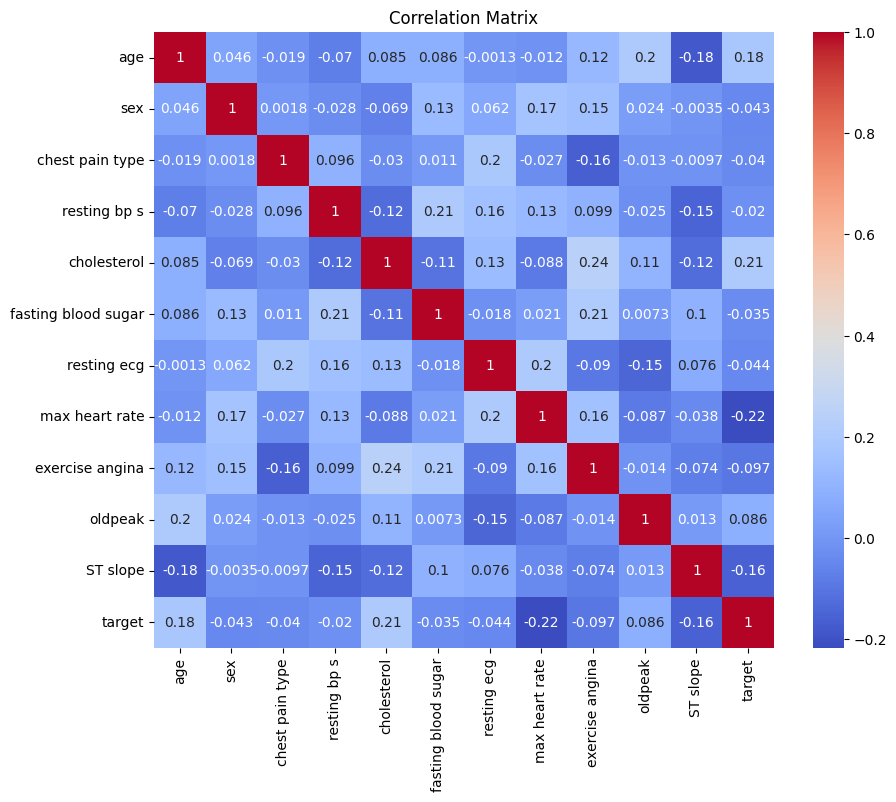

In [46]:
print("\nCorrelation matrix:")
print(df.corr())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation**: The correlation heatmap shows the degree of relation between attribute.

Here, we can interpret that the target (weather the patient has a heart disease or not) is influenced the most by chest pain type, age, sex, exercise enigma, and ST slope.

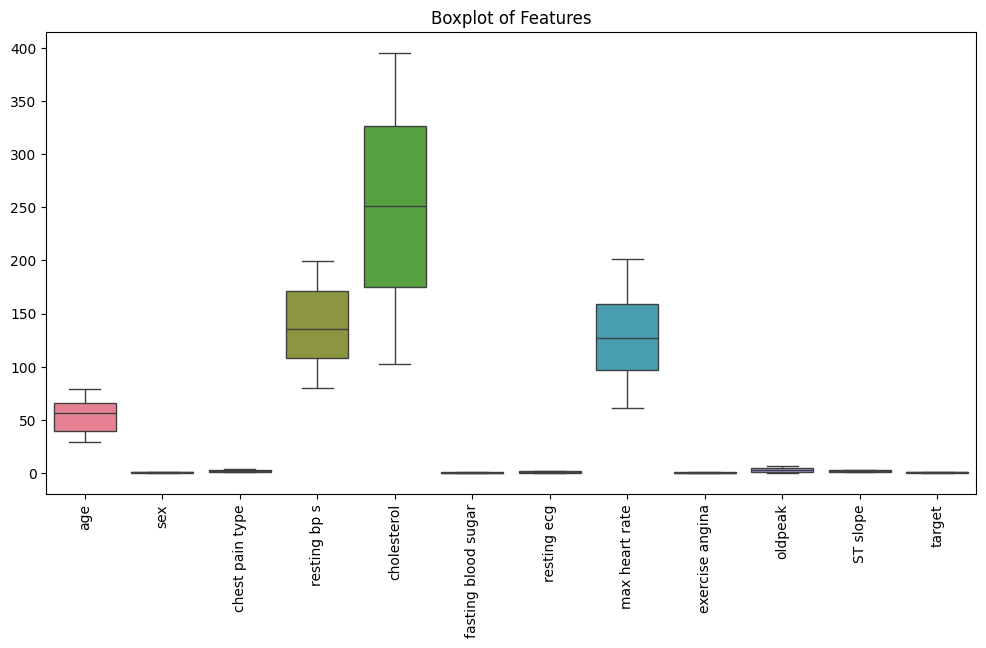

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

**Interpretation**:

From the above Boxplot it can be interpreted that:

Colestrol Levels of some people extend upto the level 400. (outlier)

The age values range from around 35 to 80 in the dataset with the mean around 50.

The different features have different scale of values which may lead to inconsistent/inaccurate answers, hence we would need to do feature scaling to remove this bias.

# **Outliers using IQR** (Dataset 2)

In [48]:
df.shape

(100, 12)

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                     26.25000
sex                      1.00000
chest pain type          2.00000
resting bp s            63.00000
cholesterol            151.25000
fasting blood sugar      1.00000
resting ecg              2.00000
max heart rate          62.25000
exercise angina          1.00000
oldpeak                  3.27771
ST slope                 2.00000
target                   1.00000
dtype: float64


**Interpretation**: The IQR helps to identify the range within which the central 50% of the values lie. Here it shows that ST slope range (central Tendancy) in the dataset are near 1.

In [50]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(100, 12)

**Interpretation**: This shows that the dataset had outliers and after removal of ouliers there are 100 rows of data left.

# **Train-Test Split** (Dataset 2)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Interpretation**: Here we have made a train test split of 75:25. The X_train consists of the values set and the y_train consists the outcome set.

In [52]:
print(X_train)

[[4.50000000e+01 0.00000000e+00 4.00000000e+00 1.11000000e+02
  3.36000000e+02 0.00000000e+00 2.00000000e+00 1.57000000e+02
  0.00000000e+00 3.60822269e+00 2.00000000e+00]
 [3.90000000e+01 0.00000000e+00 2.00000000e+00 1.80000000e+02
  1.26000000e+02 0.00000000e+00 0.00000000e+00 1.21000000e+02
  0.00000000e+00 2.02406011e+00 1.00000000e+00]
 [5.70000000e+01 1.00000000e+00 3.00000000e+00 1.73000000e+02
  2.30000000e+02 1.00000000e+00 2.00000000e+00 1.97000000e+02
  0.00000000e+00 1.59763391e+00 2.00000000e+00]
 [6.80000000e+01 0.00000000e+00 1.00000000e+00 8.00000000e+01
  3.08000000e+02 0.00000000e+00 2.00000000e+00 1.84000000e+02
  0.00000000e+00 7.76151912e-01 2.00000000e+00]
 [6.10000000e+01 0.00000000e+00 3.00000000e+00 1.64000000e+02
  2.51000000e+02 0.00000000e+00 0.00000000e+00 1.59000000e+02
  1.00000000e+00 3.26369650e+00 2.00000000e+00]
 [4.80000000e+01 0.00000000e+00 1.00000000e+00 1.08000000e+02
  3.08000000e+02 0.00000000e+00 1.00000000e+00 1.32000000e+02
  1.00000000e+00

In [53]:
print(y_train)

[1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0
 0]


In [54]:
print(X_test)

[[3.10000000e+01 1.00000000e+00 4.00000000e+00 1.48000000e+02
  2.53000000e+02 1.00000000e+00 2.00000000e+00 1.47000000e+02
  1.00000000e+00 4.89613074e+00 1.00000000e+00]
 [5.30000000e+01 1.00000000e+00 2.00000000e+00 1.99000000e+02
  2.29000000e+02 1.00000000e+00 2.00000000e+00 1.56000000e+02
  1.00000000e+00 6.48320610e-01 1.00000000e+00]
 [5.30000000e+01 1.00000000e+00 4.00000000e+00 1.12000000e+02
  1.54000000e+02 1.00000000e+00 0.00000000e+00 9.80000000e+01
  0.00000000e+00 2.80437336e+00 2.00000000e+00]
 [6.30000000e+01 1.00000000e+00 2.00000000e+00 1.90000000e+02
  1.97000000e+02 1.00000000e+00 1.00000000e+00 9.90000000e+01
  0.00000000e+00 4.87186682e-01 2.00000000e+00]
 [5.80000000e+01 1.00000000e+00 4.00000000e+00 1.71000000e+02
  2.67000000e+02 1.00000000e+00 1.00000000e+00 1.15000000e+02
  1.00000000e+00 2.05859275e-01 3.00000000e+00]
 [3.60000000e+01 0.00000000e+00 3.00000000e+00 1.90000000e+02
  2.16000000e+02 1.00000000e+00 1.00000000e+00 1.04000000e+02
  0.00000000e+00

In [55]:
print(y_test)

[1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1]


# **Feature Scaling** (Dataset 2)

In [56]:
X = df.drop('target', axis=1)
y = df['target']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Interpretation**:

scaler = StandardScaler(): Initializes an instance of StandardScaler.

X_standard = scaler.fit_transform(X_train): Fits the StandardScaler to the training data (X_train) and then transforms it.


---


Here we need Feature Scaling some values such as age were only upto 80-100, while some values such as chlosterol went upto 600. This would have lead to biased model which would produce inaccurate results. Here when we use standard scalar all value are scaled within the range -1 to 1, hence removing the bias.

In [57]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 75 samples
Test set size: 25 samples


**Interpretation**: This shows that the dataset has been effectively split into 75:25 with 419 record in train data and 140 record in test data.

# **Training Naive Bayes Model On Training Set** (Dataset 2)

In [58]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Interpretation**: Here, we have effectively created an instance of Gaussian NB (Naive Bayes) and then fit the train data to it.

**Testing for a random set of valid values**

In [59]:
print(classifier.predict(sc.transform([[70, 1, 4, 140, 480, 1, 1, 175, 1, 1.5, 2]])))

[1]


**Interpretation**:

When we use a set of values, i.e., suppose a patient with Age 70, Male, Asymptomatic chest pain, Resting blood pressure of 140 mm Hg, Serum cholesterol level of 480 mg/dl, Fasting blood sugar > 120 mg/dl, Resting electrocardiographic results showing ST-T wave abnormality, Maximum heart rate of 175, Exercise-induced angina, ST depression of 1.5 induced by exercise relative to rest, and Flat slope of the peak exercise ST segment, the model predicts that the patient has heart disease (target = 1).

# **Predicting the Test Set Results** (Dataset 2)

In [60]:
y_pred = classifier.predict(X_test)
results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)
print(results)

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]]


**Interpretation**: The two values in each row represent the predicted label and the actual label for each data point in the test set.

1.  The first value is the predicted label by the classifier.
2.  The second value is the actual label from the test set.

From the results it can be seen that most of the test datapoints have been classified correctly but there are also some datapoints that have been misclassified by the model.

# **Calculating the accuracy of the model** (Dataset 2)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.6


**Interpretation**: The accuracy of a model can be calculated using the accuracy_score method of sklearn.metrics library.

Here the Accuracy Score comes out to be 0.85, this means that 85% of the test data are correctly classified when clecked with the actual labels of the test data.

# **Making the Confusion Matrix** (Dataset 2)


Confusion Matrix:
[[7 6]
 [4 8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.57      0.67      0.62        12

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.61      0.60      0.60        25



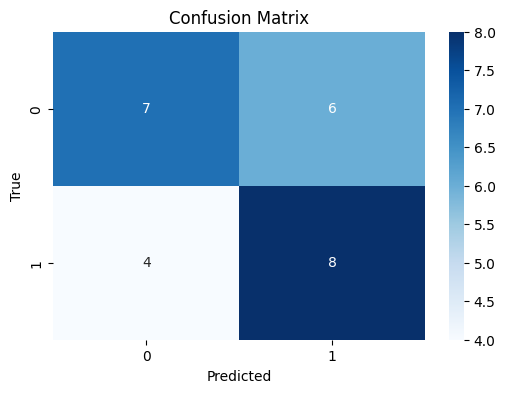

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Interpretation**:

**Confusion Matrix**

**True Positives (TP):** The model correctly predicted 7 positive cases (actual class 1).

**True Negatives (TN):** The model correctly predicted 8 negative cases (actual class 0).

**False Positives (FP):** The model incorrectly predicted 6 cases as positive when they were actually negative.

**False Negatives (FN):** The model incorrectly predicted 4 cases as negative when they were actually positive.



**Classification Report** The classification report provides a detailed evaluation of the performance of the k-NN model on each class.

for example, considering class 0:

Class 0 (Has no Heart Disease)

**Precision**: Out of all the cases the model predicted as negative, 64% were actually negative.

**Recall**: Out of all the actual negative cases, the model correctly identified 54%.

**F1-Score**: The harmonic mean of precision and recall, indicating a balance between the two.

**Support**: The number of actual negative cases in the dataset.

# **ROC Curve** (Dataset 2)

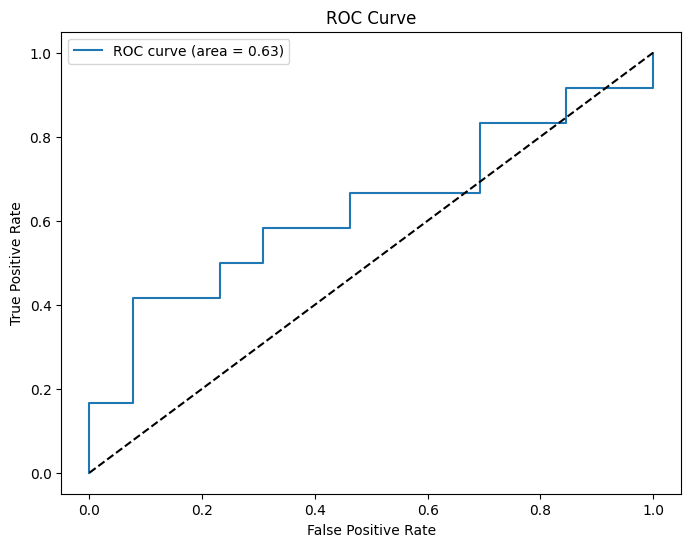


ROC AUC Score: 0.6282051282051282


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

print("\nROC AUC Score:", roc_auc)

**Interpretation**: The ROC AUC score of 0.952 indicates that the model has an excellent ability to distinguish between the positive and negative classes.

The closer the ROC curve is to the top-left corner, the better the model. This indicates a high TPR and a low FPR.

# **Visualizations Of Training/Testing Data** (dataset 2)

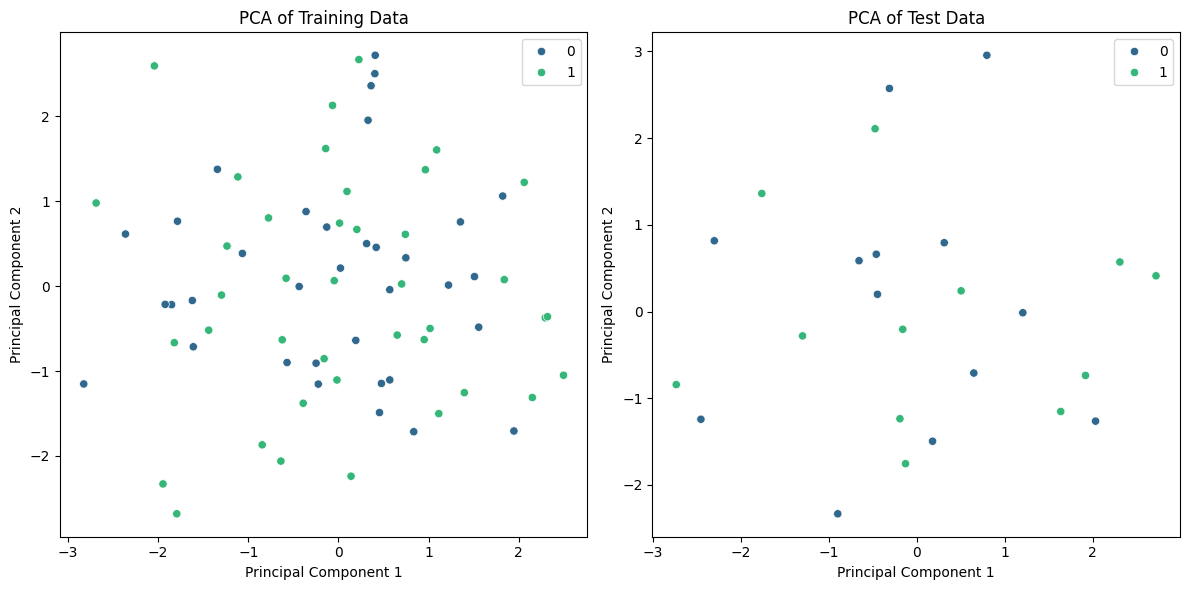

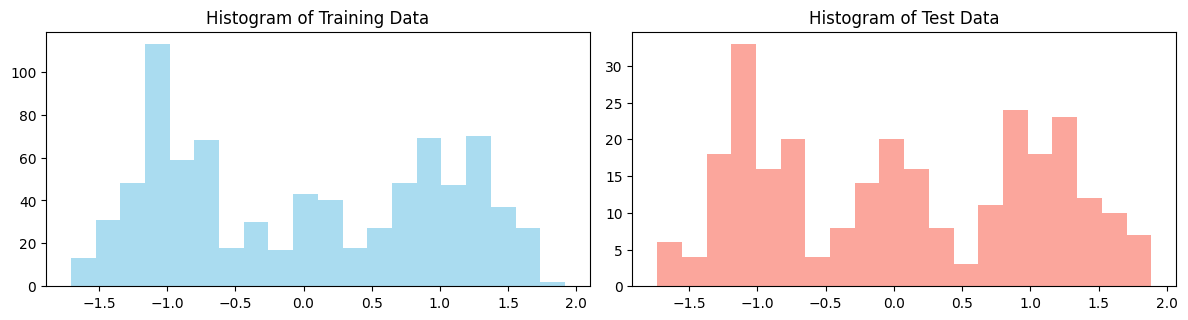

In [69]:
from sklearn.decomposition import PCA

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)


pca_train = PCA(n_components=2)
X_train_pca = pca_train.fit_transform(X_train)

pca_test = PCA(n_components=2)
X_test_pca = pca_test.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', legend='full')
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='viridis', legend='full')
plt.title('PCA of Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(X_train_df.values.flatten(), bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Training Data')

plt.subplot(2, 2, 2)
plt.hist(X_test_df.values.flatten(), bins=20, color='salmon', alpha=0.7)
plt.title('Histogram of Test Data')

plt.tight_layout()
plt.show()

**Interpretation**:

**PCA**:

from the above two charts it is visible that there is a lot of similarity in the distribution of data point. for example, most of the datapoint lie between 2 and -2 (Y-axis), most of the class 0 datapoint are on the left of 0 on X-Axis and most class 1 Datapoints on the right.

These similarities depict that the model is accurately able to classify the test data.

There are also a few dissimilarities representing the misclassifications in the data.

**Histogram**:

Both histograms exhibit a similar range of values from -3 to 3.

The training data demonstrates higher frequencies in certain bins compared to the test data, suggesting the training dataset might be larger.

Both the histograms depict highest peak at values around 0.

The test data shows a high level of similarity with the traing data, this is a positive indicator showing that the model has verywell understood the distibutions and outcomes and is pridiction correctly to a large extent.

